In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


## EDA

In [3]:
df.shape

(164, 8)

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


## Statistics

In [7]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


## Unique value

In [8]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [9]:
for col in df.columns:
    print("******************************************************************************************")
    print(f"Unique Values in {col} are :",df[col].unique())

******************************************************************************************
Unique Values in Age are : [25 30 35 40 45 50 26 31 36 41 46 51 27 32 37 42 47 52 28 33 38 43 48 53
 29 34 39 44 49]
******************************************************************************************
Unique Values in Gender are : ['Female' 'Male']
******************************************************************************************
Unique Values in Income are : [ 50000 100000  75000 125000 150000  40000  60000  80000 105000  90000
 135000  35000  55000  70000  95000  85000  30000  65000 115000  25000
  45000 130000 155000 110000 140000  37500  57500  72500  32500  52500
  67500  92500  82500 122500  27500  47500  62500  87500  77500 112500
 117500 142500 160000  97500 145000 162500 120000 102500 137500 127500
  82000  68000]
******************************************************************************************
Unique Values in Education are : ["Bachelor's Degree" "Master's Degree

## Null Values

In [10]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

## Converting to numerical 

In [11]:
cat_col=df.select_dtypes(include="object").columns
cat_col

Index(['Gender', 'Education', 'Marital Status', 'Home Ownership',
       'Credit Score'],
      dtype='object')

In [12]:
le=LabelEncoder()

for col in cat_col:
    df[col]= le.fit_transform(df[col])



In [13]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


## Correlation 

<AxesSubplot:>

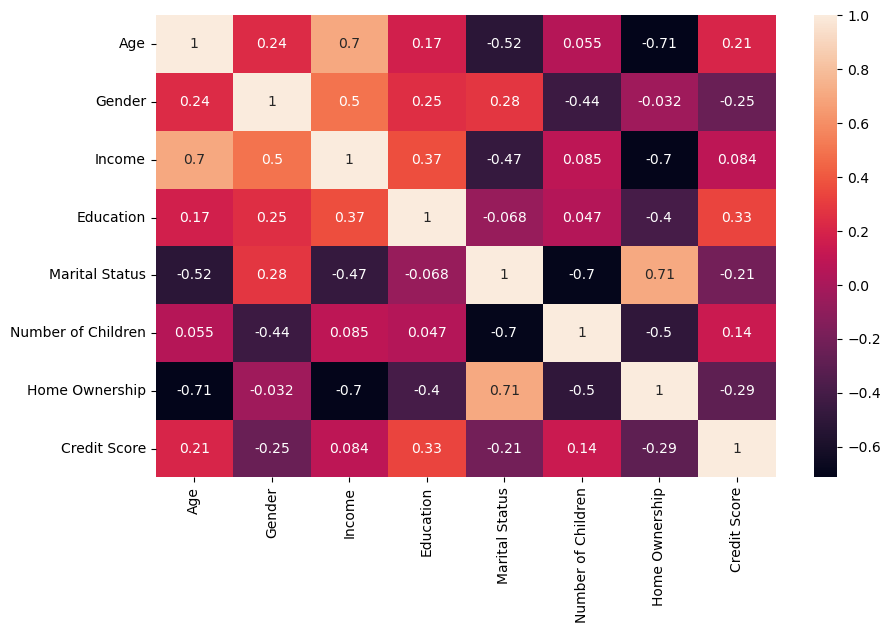

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True)

## Class Distribution

In [15]:
df['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

In [17]:
X= df.drop('Credit Score',axis= 1)
y= df['Credit Score']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [18]:
sm= SMOTE(random_state= 42)

X_res, y_res= sm.fit_resample(X_train, y_train)
print('Class distribution before resampling:\n', y_train.value_counts())
print("***************************************************************")
print('Class distribution after resampling:\n', y_res.value_counts())

Class distribution before resampling:
 1    90
0    29
2    12
Name: Credit Score, dtype: int64
***************************************************************
Class distribution after resampling:
 1    90
0    90
2    90
Name: Credit Score, dtype: int64


## Visualization

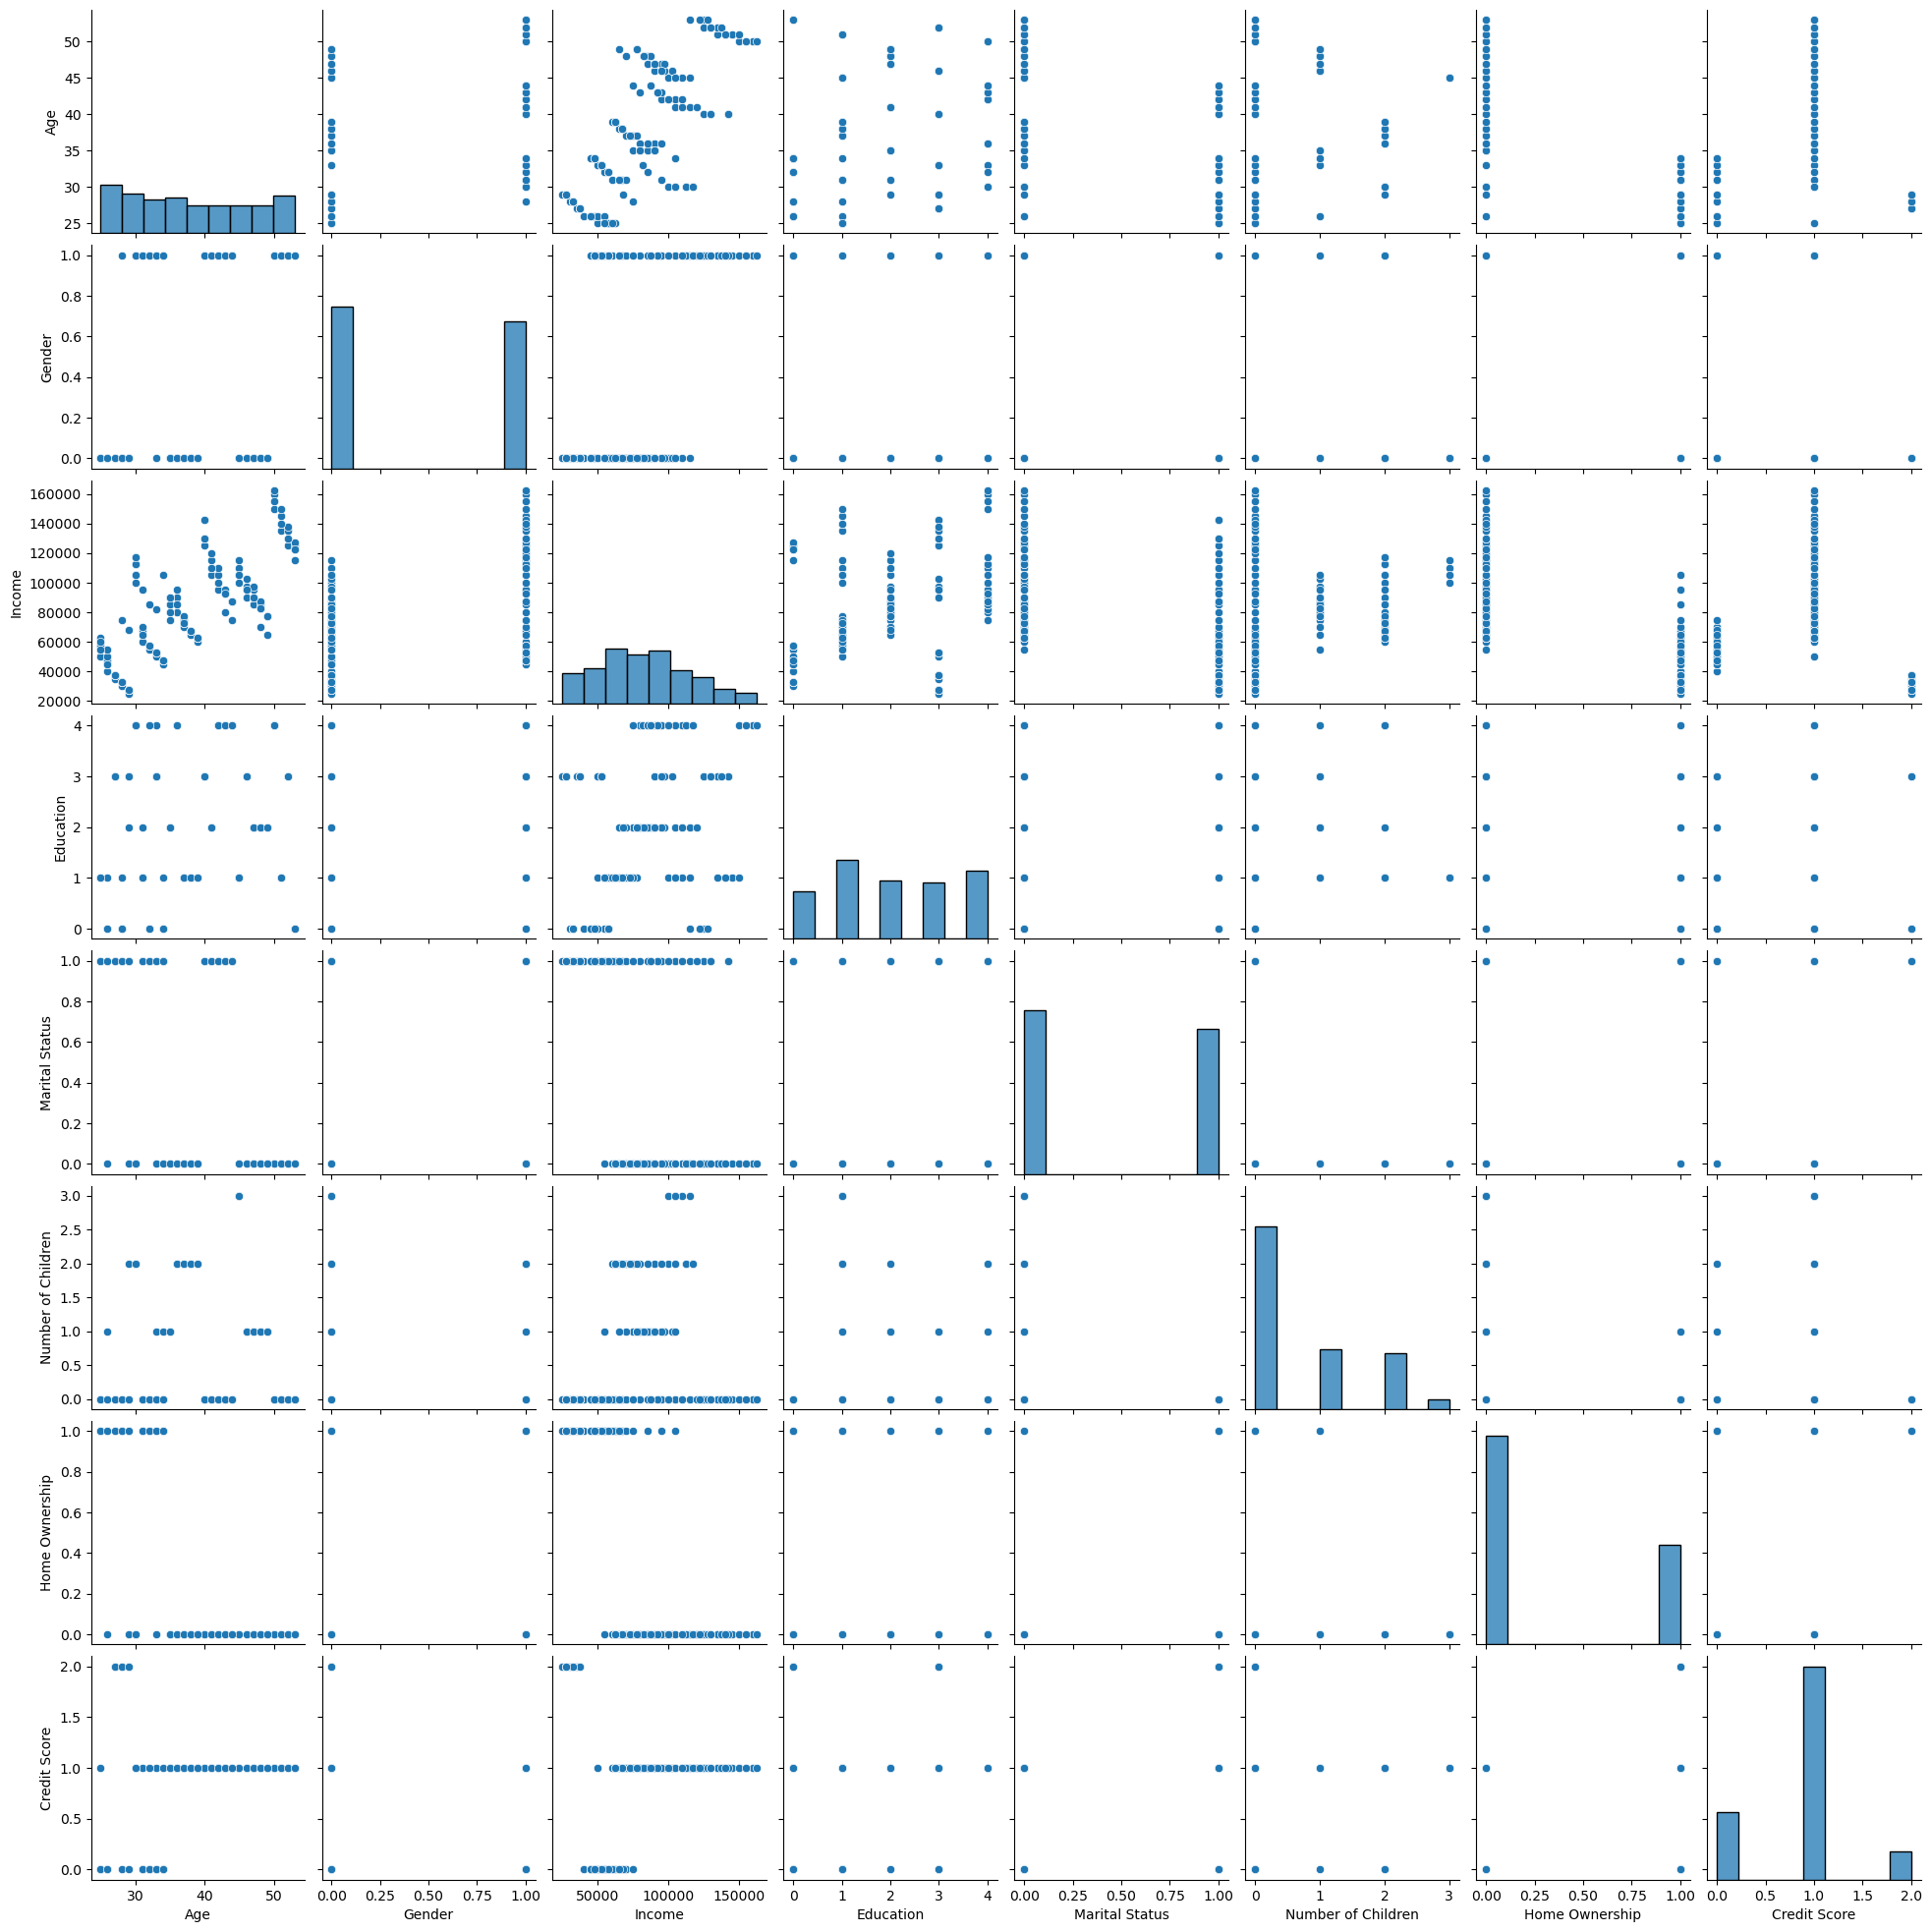

In [19]:
sns.pairplot(df)

# Pie Plot

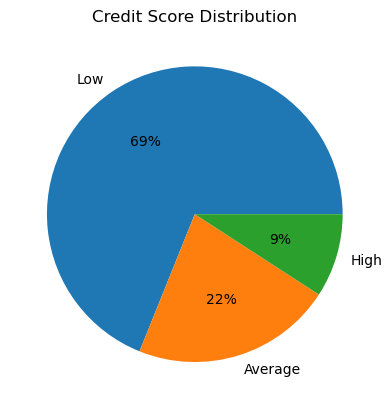

In [20]:
class_counts=  df['Credit Score'].value_counts()

labels= ['Low','Average','High']

values= class_counts.values

plt.pie(values, labels=labels, autopct="%1.0f%%")
plt.title("Credit Score Distribution")
plt.show()

In [21]:
# combine X_train_res and y_train_res
train_data = pd.concat([X_res, y_res], axis=1)

from pycaret.classification import *
s = setup(data=train_data, target='Credit Score', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Credit Score
2,Target type,Multiclass
3,Original data shape,"(270, 8)"
4,Transformed data shape,"(270, 8)"
5,Transformed train set shape,"(189, 8)"
6,Transformed test set shape,"(81, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9947,1.0000,0.9947,0.9955,0.9947,0.9921,0.9925,0.2930
ada,Ada Boost Classifier,0.9947,0.9983,0.9947,0.9954,0.9947,0.9921,0.9924,0.1500
lightgbm,Light Gradient Boosting Machine,0.9947,0.9992,0.9947,0.9954,0.9947,0.9921,0.9924,0.4010
catboost,CatBoost Classifier,0.9947,0.9992,0.9947,0.9955,0.9947,0.9921,0.9925,1.5930
et,Extra Trees Classifier,0.9895,1.0000,0.9895,0.9910,0.9894,0.9842,0.9850,0.2440
gbc,Gradient Boosting Classifier,0.9892,1.0000,0.9892,0.9907,0.9891,0.9838,0.9846,0.3870
xgboost,Extreme Gradient Boosting,0.9842,0.9992,0.9842,0.9849,0.9841,0.9762,0.9766,0.0880
dt,Decision Tree Classifier,0.9839,0.9878,0.9839,0.9861,0.9838,0.9758,0.9770,0.0340
lr,Logistic Regression,0.9787,0.9959,0.9787,0.9816,0.9785,0.9679,0.9695,2.7490
svm,SVM - Linear Kernel,0.9737,0.0000,0.9737,0.9766,0.9734,0.9604,0.9618,0.0470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

## Decision Tree Model

In [23]:
Dt= create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
6,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
pred= predict_model(Dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Cross Val Score

In [25]:
score = cross_val_score(Dt, X_res, y_res, cv=10)
score

array([1.        , 0.98148148, 0.96296296, 1.        , 0.96296296])

## Plot

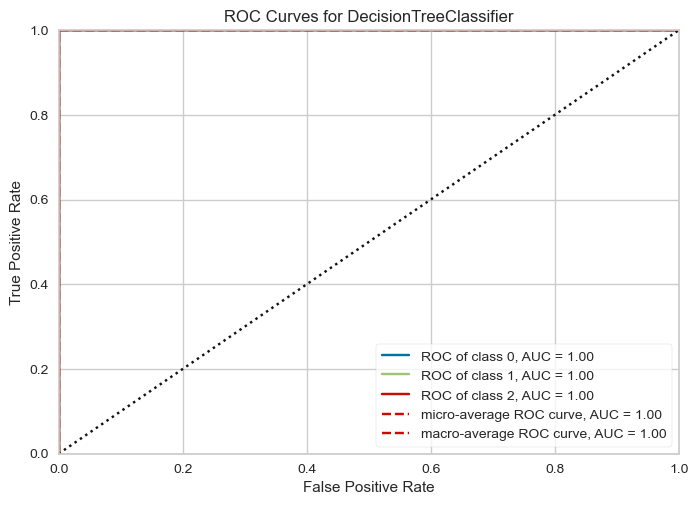

In [26]:
plot_model(Dt)

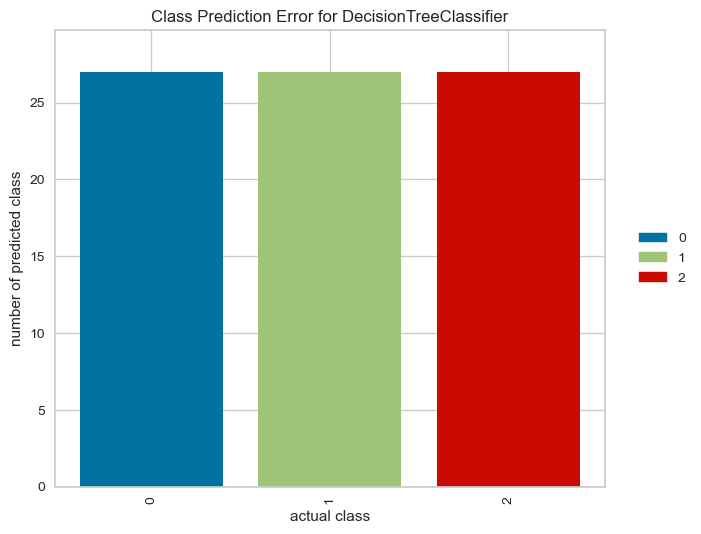

In [28]:
plot_model(Dt, plot = 'error')

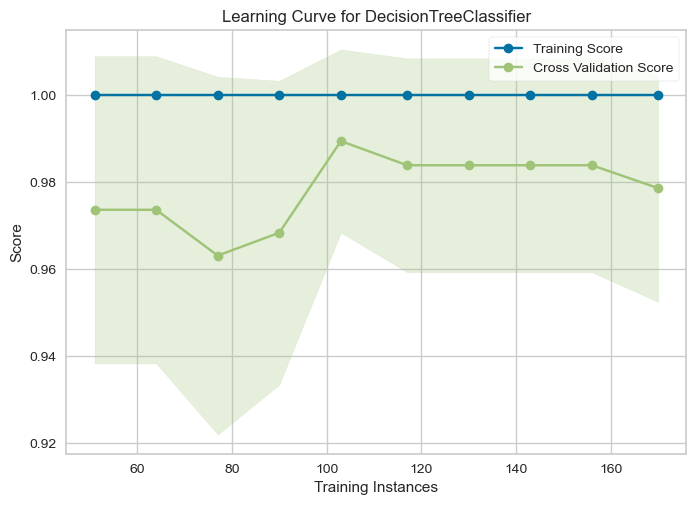

In [29]:
plot_model(Dt, plot = 'learning')

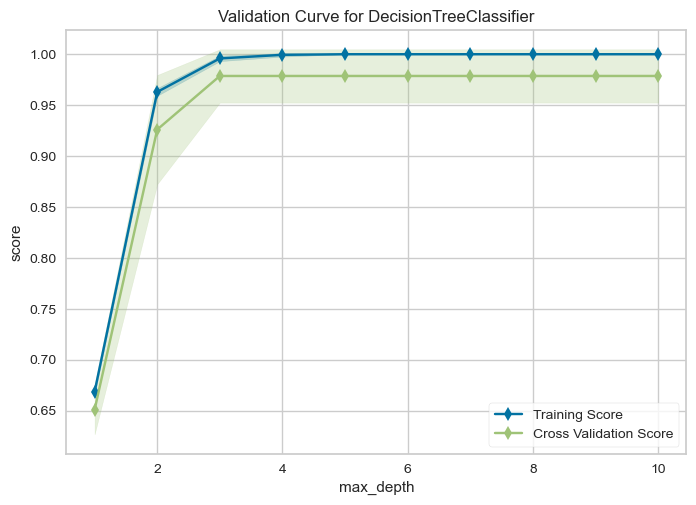

In [30]:
plot_model(Dt, plot = 'vc')

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',       # Splitting criterion ('gini' or 'entropy')
    max_depth=3,         # Maximum depth of the tree (None means unlimited)
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required at a leaf node
    max_features=None,      # Maximum number of features to consider for splitting
    random_state=None,      # Seed for random number generator
)

clf.fit(X_res, y_res)

scores = cross_val_score(clf, X_res, y_res, cv=20)

# Predict the labels for the test data
y_preds = clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      0.96      0.98        23
           2       0.75      1.00      0.86         3

    accuracy                           0.94        33
   macro avg       0.87      0.94      0.90        33
weighted avg       0.95      0.94      0.94        33



In [49]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

rf.fit(X_res, y_res)

scores = cross_val_score(rf, X_res, y_res, cv=20)

# Predict the labels for the test data
y_preds = rf.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      0.96      0.98        23
           2       0.75      1.00      0.86         3

    accuracy                           0.94        33
   macro avg       0.87      0.94      0.90        33
weighted avg       0.95      0.94      0.94        33



In [ ]:
# Create a dictionary of classifiers with hyperparameters
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', C=1.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=1)
}

# Store results including training and testing scores and classification report
best_model = None
best_accuracy = 0.0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Calculate training score
    train_score = clf.score(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print()
    
    # Check if this model has the highest accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = clf

# Print the best model details
if best_model is not None:
    print("Best Model (Highest Testing Accuracy):")
    print(best_model)